> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


### Question(s) for Analysis
* **What is the number of patients that showed up and did not show up for their appointment?**
* **What is the average age of patients that showed up for their appointment?**
* **What is the number of patients that showed up who received and did not receive SMS?**
* **What is the number of patients that showed up who are under scholarship against those that are not under scholarship?**

In [102]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import IPython
print(IPython.sys_info())

{'commit_hash': '4396dd620',
 'commit_source': 'installation',
 'default_encoding': 'cp1252',
 'ipython_path': 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\IPython',
 'ipython_version': '8.4.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.19043-SP0',
 'sys_executable': 'C:\\Users\\USER\\anaconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit '
                '(AMD64)]'}


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

^C


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [103]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowaptmt.csv')



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [104]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [105]:
#check for number of duplicate
df.duplicated().sum()

0

In [106]:
#rename column No-show to No_show
df.rename(columns = {'No-show': 'No_show'}, inplace = True)

In [152]:
#rename of value to avoid confusion
df.replace(['No', 'Yes'], ['Showed up', 'Not Showed up'], inplace = True)


In [107]:
#display number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No_show                2
dtype: int64

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [121]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No_show                2
dtype: int64

In [123]:
#checking for mistype or duplicate values
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [124]:
#checking for mistype or duplicate values
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [125]:
#checking for mistype or duplicate values
df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Histogram distribution of Age

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


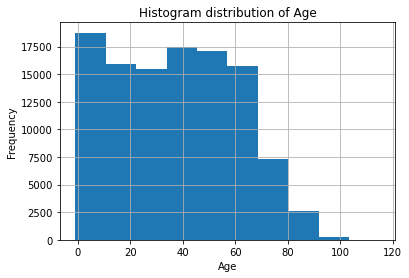

In [126]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.Age.hist();
plt.title('Histogram distribution of Age')
plt.ylabel('Frequency')
plt.xlabel('Age');
pd.DataFrame(df.Age.describe())

> **Inference:** It's observe that it is skew to the right and it is of leptokurtic in nature. It is also between the range of 0 to 10 and the highest count is 18800

### Histogram distribution of Appoiintment ID

,AppointmentID
count,1.105270e+05
mean,5.675305e+06
std,7.129575e+04
min,5.030230e+06
25%,5.640286e+06
50%,5.680573e+06
75%,5.725524e+06
max,5.790484e+06


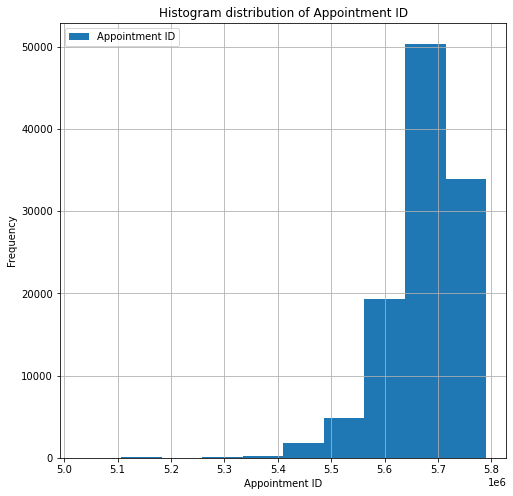

In [127]:
#Histogram distribution of Appointment ID
df.AppointmentID.hist(figsize=(8,8),label = 'Appointment ID')
plt.title('Histogram distribution of Appointment ID')
plt.ylabel('Frequency')
plt.xlabel('Appointment ID')
plt.legend();
pd.DataFrame(df.AppointmentID.describe())

> **Inference:** It was observed that the distribution is skew to the left and it is of mesokurtic in nature

### Histogram of whole dataset

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


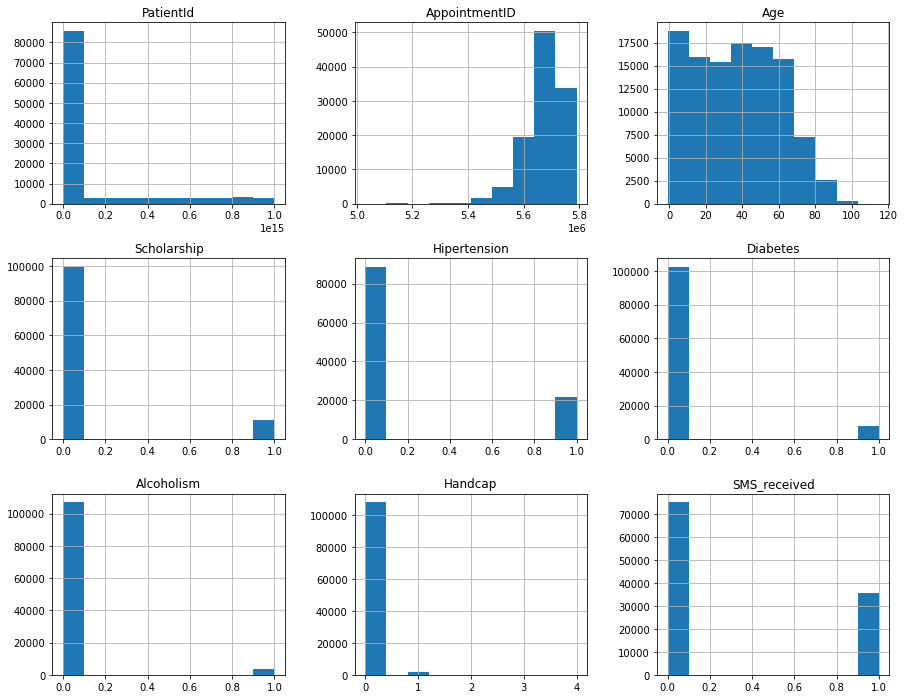

In [128]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.hist(figsize =(15,12));
df.describe()

### Drawing Conclusion

In [16]:
#Patients that showed up for the scheduled appointment
df_show_patient = df.query('No_show == "No"')

#Patient that didn't show up for the scheduled appointment
df_no_show_patient = df.query('No_show == "Yes"')
confirm_show = df.shape[0]
confirm_show == df_show_patient.count() + df_no_show_patient.count()


PatientId         True
AppointmentID     True
Gender            True
ScheduledDay      True
AppointmentDay    True
Age               True
Neighbourhood     True
Scholarship       True
Hipertension      True
Diabetes          True
Alcoholism        True
Handcap           True
SMS_received      True
No_show           True
dtype: bool

In [17]:
print("Population of patients that failed to showed up for their schedule appointment {}".format(df_no_show_patient.No_show.value_counts()))
print("Population of patients that showed up for their schedule appointment {}".format(df_show_patient.No_show.value_counts()))

Population of patients that failed to showed up for their schedule appointment Yes    22319
Name: No_show, dtype: int64
Population of patients that showed up for their schedule appointment No    88208
Name: No_show, dtype: int64


No_show
Not Showed up    22319
Showed up        88208
Name: PatientId, dtype: int64

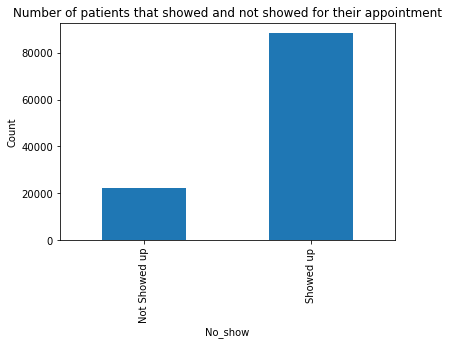

In [153]:
df.groupby('No_show')['PatientId'].count().plot(kind='bar').set_ylabel('Count')
plt.title('Number of patients that showed and not showed for their appointment')
df.groupby('No_show')['PatientId'].count()

> **Inference:** It showcased the number of patients that showed up against those that did not showed up for their appointment

In [18]:
#groupby function for showed patient data
def show_patient_groupby(groupColumn, showColumn):
    """returns the show patient data frame for a specific column by grouping by a column"""
    return df_show_patient.groupby(groupColumn)[showColumn]

In [34]:
def no_show_patient_groupby(groupColumn, showColumn):
    """returns the no show patient data frame for a specific column by grouping by a column"""
    return df_no_show_patient.groupby(groupColumn)[showColumn]

### AVERAGE AGE OF PATIENTS THAT SHOWED UP FOR THEIR APPOINTMENT 

No_show
Not Showed up    34.317667
Showed up        37.790064
Name: Age, dtype: float64

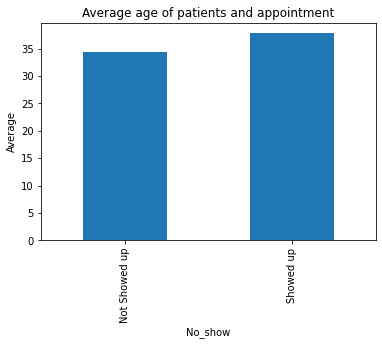

In [154]:
df.groupby('No_show')['Age'].mean().plot(kind ='bar').set_ylabel('Average')
plt.title('Average age of patients and appointment')
df.groupby('No_show')['Age'].mean()

> **Inference:** The average age of people that showed up for their appointment has no much significant to those that did not show up

### NUMBER OF PATIENTS THAT BOTH RECEIVED AND NOT RECEIVED SMS

In [76]:
show_patient_groupby('SMS_received', 'SMS_received').count()

SMS_received
0    62510
1    25698
Name: SMS_received, dtype: int64

## PATIENTS THAT SHOWED UP FOR THEIR APOINTMENT BY GENDER 

No_show  Gender
No       F         57246
         M         30962
Name: Gender, dtype: int64

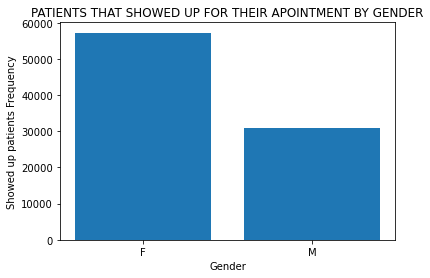

In [158]:

plt.bar(df_show_patient.Gender.unique(), show_patient_groupby('No_show','Gender').value_counts())
plt.title('PATIENTS THAT SHOWED UP FOR THEIR APOINTMENT BY GENDER')
plt.xlabel('Gender')
plt.ylabel('Showed up patients Frequency');
show_patient_groupby('No_show','Gender').value_counts()

No_show  Gender
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

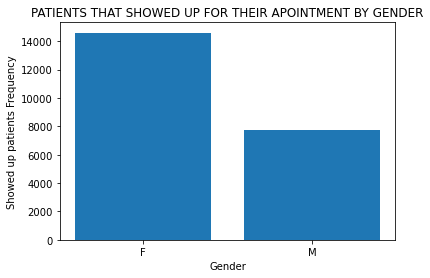

In [157]:
plt.bar(df_no_show_patient.Gender.unique(), no_show_patient_groupby('No_show','Gender').value_counts())
plt.title('PATIENTS THAT SHOWED UP FOR THEIR APOINTMENT BY GENDER')
plt.xlabel('Gender')
plt.ylabel('Showed up patients Frequency');
no_show_patient_groupby('No_show','Gender').value_counts()

> **Facts:** Most patients gender that did not show up for their appointment are female

### NUMBER OF PATIENTS THAT SHOWED UP AND DID NOT SHOWED UP FOR THEIR APPOINTMENT BY SCHOLARSHIP STATUS
Number of patients that showed up for their appointment with no scholarship are huge compare to without scholarship

In [84]:
show_patient_scholarship = show_patient_groupby('Scholarship', 'No_show').value_counts()
no_show_patient_scholarship = no_show_patient_groupby('Scholarship', 'No_show').value_counts()
print('Number of patient with and without scholarship and showed up for their appointment: {}'.format(show_patient_scholarship))
print('Number of patient with and without scholarship and did not showed up for their appointment {}'.format(no_show_patient_scholarship))

Number of patient with and without scholarship and showed up for their appointment: Scholarship  No_show
0            No         79925
1            No          8283
Name: No_show, dtype: int64
Number of patient with and without scholarship and did not showed up for their appointment Scholarship  No_show
0            Yes        19741
1            Yes         2578
Name: No_show, dtype: int64


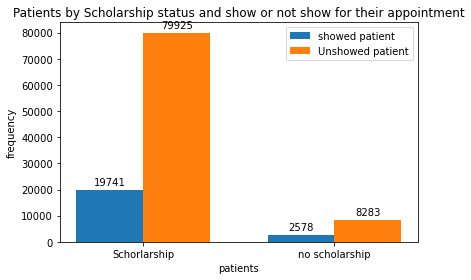

Number of patient with and without scholarship and showed up for their appointment: Scholarship  No_show
0            No         79925
1            No          8283
Name: No_show, dtype: int64
Number of patient with and without scholarship and did not showed up for their appointment Scholarship  No_show
0            Yes        19741
1            Yes         2578
Name: No_show, dtype: int64


In [137]:
labels = ['Schorlarship', 'no scholarship']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2,no_show_patient_scholarship, width,label='showed patient')
rect2 = ax.bar(x + width/2,show_patient_scholarship, width,label='Unshowed patient')
ax.legend()
ax.set_xticks(x,labels)
ax.set_title('Patients by Scholarship status and show or not show for their appointment')
ax.bar_label(rect1, padding = 3)
ax.set_ylabel('frequency')
ax.set_xlabel('patients')
ax.bar_label(rect2, padding = 3)
fig.tight_layout()

plt.show()
print('Number of patient with and without scholarship and showed up for their appointment: {}'.format(show_patient_scholarship))
print('Number of patient with and without scholarship and did not showed up for their appointment {}'.format(no_show_patient_scholarship))

> **Facts:** The above visualization cum analysis has depicted that most patients are on scholarship and few out of those on scholarship showed up for Appointment.

## CONCLUSION
### Results
> **Histogram distribution of Age was observed that it is skewed to the right and it is leptokurtic in nature. It is also between the range of 0 to 10 and the highest count is 18800**

> **Histogram distribution of Appointment ID was observed that the distribution is skewed to the left and it is mesokurtic in nature**

> **The number of patients that showed up for their appointment is 88208. The number of patients that did not show up for their appointment is 22319. The average age of patients that showed up for their appointment was 37.79 against those that did not show up which is 34.317667 .**

> **The number of patients that received SMS is low compared to those that did not receive SMS among the patients that showed up for their appointment.**

> **The number of patients under scholarship was low compared to the number of patients that did not have scholarships among the patients that showed up for their appointment**

> **The analysis has proved that most patients gender that showed up and did not show up for their appointment are Female 


### Limitation
> **The data are categorical in nature which has prevent us from carrying out a correlation plot.**

> **The information provided on the handcap column is not sufficient**

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1